
# P2I7: Mini Projet 1 - Gaz Parfaits - Code B - Rebond


## Prénom Nom - Groupe - Date :

16/03/2023 SAMAIN Luc G93 G274


## Modélisation du rebond d’une particule sur un mur

Dans cette section, on va s'appuyer sur le script précédent pour créer un simulateur de rebond. Le système à modéliser est le suivant :

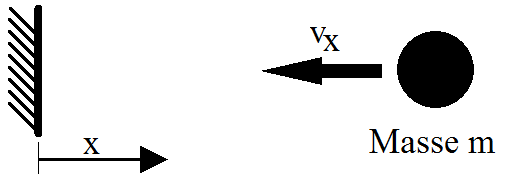

La masse est toujours considérée ponctuelle (i.e. de dimensions nulles), elle est animée d'une vitesse initiale Vx0 (négative, sinon le rebond n'aura pas lieu), et sa position X est repérée par rapport à celle du mur où aura lieu le rebond. Ce système est identique au précédent, à la différence que le ressort n'agit que si la masse ponctuelle pénètre dans le mur (i.e. pour X<0). Il peut seulement repousser la masse du mur, en aucun cas l'attirer. Le premier bloc de code charge les bibliothèques nécessaires :

In [1]:
#libraries à importer
%matplotlib inline
from matplotlib import pyplot as plt#librairie d'affichage
import numpy as np

## Etape 1

Reprendre les scripts utilisés dans les étapes 1 et 2 du notebook "Ressort". Créer et renseigner les variables suivantes : T0 et Tf (instants initial et final de la simulation), dT (pas de temps de la résolution), X0 et Vx0 (conditions initiales), M et K. Vous pouvez aussi créer une chaîne de caractère nommée "Solver", de façon à pouvoir basculer facilement d'un schéma à l'autre. Calculer le nombre de pas total de la simulation, et initialiser les vecteurs T, X, et Vx qui serviront à recueillir l'évolution au cours de la simulation des variables temps, position, et vitesse. Renseigner T0, X0 et Vx0 aux positions initiales de ces vecteurs. Prendre garde à choisir les conditions initiales de manière à rendre le rebond possible (i.e. imposer X0>0 et Vx0<0).

In [2]:
t0 = 0 # (s)
tf = 3 # (s)
dt = 1e-4 # pas de temps
#on a dt=(tf - t0)/N ==> N = (tf - t0)/dt
N = int((tf - t0)/dt)


X0 = 0.1 # repère fixe au carter gauche
Vx0 = -0.1 #m.s-1 

m = 0.01 #masse en kg de 10g 
k = 1 #raideur en N.m-1

#matrice position, vitesse, temps
T =  np.zeros(N+1)
X = np.zeros(N+1) + X0 #tout à X0 le reste sera remplacer au fur et à mesure de la simulation
Vx = np.zeros(N+1) + Vx0 #voir ligne au dessus

Solver = input("Entrer 'euler explicite' ou 'verlet modifié'")

Entrer 'euler explicite' ou 'verlet modifié'verlet modifié


## Etape 2

Reprendre le script de l'étape 3 du notebook "Ressort". Ouvrir la boucle principale. A chaque pas de temps, compléter le vecteur T et calculer la valeur de la force Fx. Attention, il faut mettre en place un test au moment du calcul de cette force, car le ressort n'agit que si X<0 (sinon il n'y a pas de contact et la force est nulle). Appliquer ensuite le schéma d'Euler et de Verlet (l'un ou l'autre, sur la base d'un test sur la chaîne de caractère "Solver", comme dans le cas du ressort) pour calculer les nouvelles valeurs de X et Vx. Fermer ensuite la boucle. Afficher alors la norme de la vitesse après rebond, pour la comparer à la vitesse incidente. Afficher également la distance maximale atteinte par la particule "à l'intérieur" du mur lors de son rebond, et la durée du rebond.

In [3]:
if Solver == "euler explicite":
    for i in range(1, N+1):
        #Mise à jour du temps:
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        
        #Mise à jour de la position:
        X[i] = X[i-1] + Vx[i-1]*dt
        
        #Mise à jour Vitesse:
        if X[i-1] < 0:
            #Force élastique car on néglige le poids:
            Fx = -k*X[i-1]

            #Accélération:
            #On a, ΣF = m *dv/dt ==> dv/dt = ΣF / m
            a = Fx/m
            
            Vx[i] = Vx[i-1] + a*dt
            
        else:
            Vx[i] = Vx[i-1]
        
elif Solver == "verlet modifié":
    for i in range(1, N+1):
        #Mise à jour du temps:
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        
        #On ne peut pas mettre à jour directement la position avec ce schéma
        #On met à jour avant la vitesse:
        
        if X[i-1] < 0:
            #Force élastique car on néglige le poids:
            Fx = -k*X[i-1]

            #Accélération:
            #On a, ΣF = m *dv/dt ==> dv/dt = ΣF / m
            a = Fx/m
            
            Vx[i] = Vx[i-1] + a*dt
            
        else:
            Vx[i] = Vx[i-1]
            
        #Mise à jour de la position:
        X[i] = X[i-1] + Vx[i]*dt #schéma euler explicite

        
        
#Affichage
print(f"Vitesse intiale:{Vx0:.2E}(m.s-1).")
print(f"Vitesse finale:{Vx[-1]:.2E}(m.s-1).")
print(f"Position maximale 'dans le mur':{min(X):.2E}(m).")

duree_rebond = 0
for position in X:
    if position<0:
        duree_rebond += dt
        
print(f"Durée du rebond:{duree_rebond}(s)")

Vitesse intiale:-1.00E-01(m.s-1).
Vitesse finale:1.00E-01(m.s-1).
Position maximale 'dans le mur':-1.00E-02(m).
Durée du rebond:0.3140999999999817(s)


## Etape 3

A la suite de la boucle, à partir des vecteurs donnant l'évolution temporelle de X et Vx, calculer l'évolution temporelle de l'énergie cinétique $0.5*M*Vx^2$ et potentielle $0.5*K*X^2$, puis l'énergie totale du système. Attention, lorsque la masse n'est pas en contact avec le mur, l'énergie potentielle est nulle (car le ressort fictif n'existe pas) ! Afficher l'écart relatif entre les énergies totales avant et après le rebond.

In [4]:
Ec = 0.5 * m * Vx**2 #Energie cinétique
Ep = np.zeros(N+1) #Energie potentielle
for i in range(N+1):
    if X[i]<0:
        Ep[i] = 0.5 * k * X[i]**2
Et = Ec + Ep

## Etape 4

Sorties graphiques : Tracer les variables X et Vx en fonction du temps.

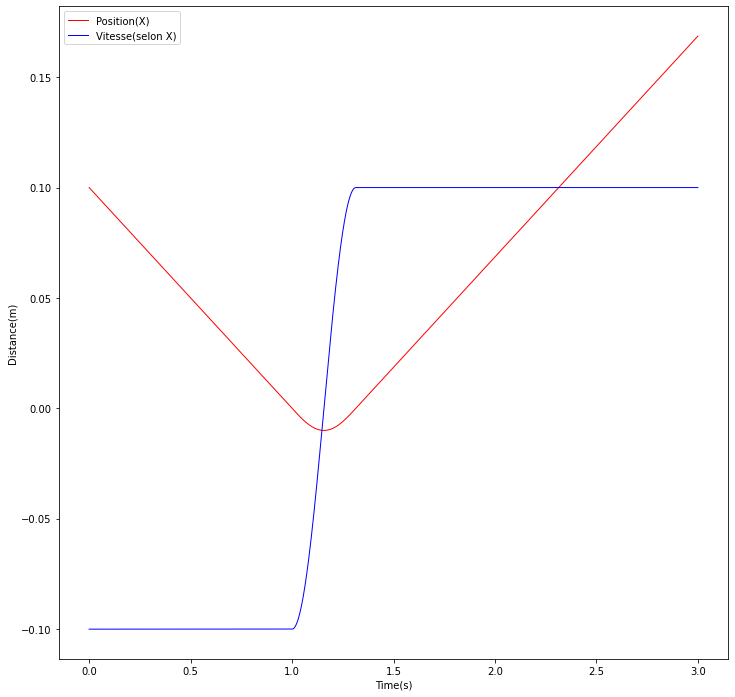

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 12))
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Distance(m)')
ax1.plot(T, X, color='red', lw=1, label='Position(X)')
ax1.plot(T, Vx, color='blue', lw=1, label='Vitesse(selon X)')
plt.legend()

## Etape 5

Sorties graphiques : Tracer les énergies cinétique, potentielle et totale en fonction du temps. 

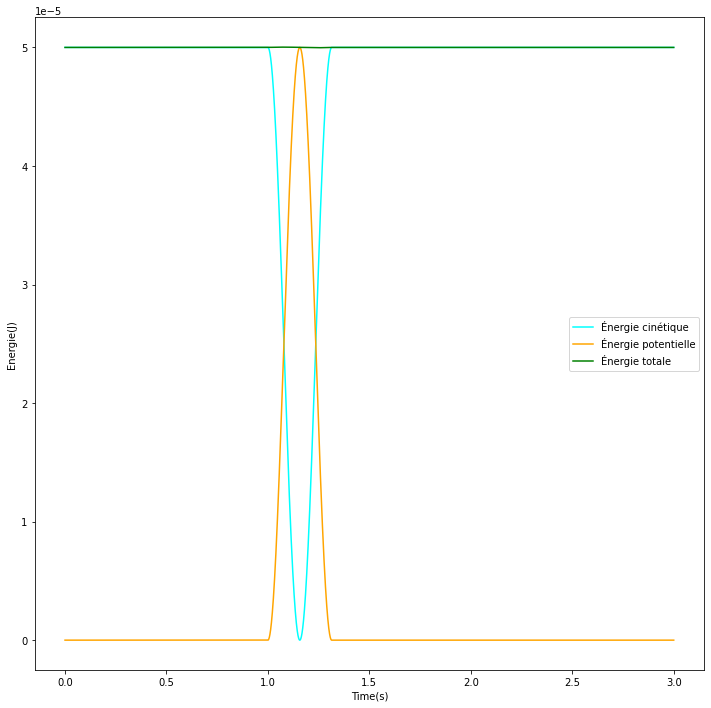

In [6]:
fig, ax2 = plt.subplots(figsize=(12,12))
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Energie(J)')
ax2.plot(T, Ec, color='cyan', lw=1.5, label='Énergie cinétique')
ax2.plot(T, Ep, color='orange', lw=1.5, label='Énergie potentielle')
ax2.plot(T, Et, color='green', lw=1.5, label='Énergie totale', linestyle='-')
plt.legend()

## Etape 6

Commentez dans la cellule suivante les résultats de votre simulation. Que pouvez-vous dire du schéma d'Euler explicite dans ce contexte ? Comment évolue l'énergie totale du système ? Que se passe-t-il si on modifie le pas de temps  de simulation ? Qu'en est-il du schéma de Verlet ?

## Réponse :

##### Contrairement à avant, Euler semble conserver l'énergie ==> pas d'instabilité. L'énergie totale du système se conserve, mais en fonction du pas de temps on obtient différents résultats. Pour un pas de temps très faible les écarts d'énergie à l'impact se réduisent. Cependant pour un pas de temps élevé on voit des problèmes à l'impact... En effet, l'énergie  ne se conserve pas et varie à l'impact. Avec euler elle augmente linéairement et avec verlet elle est décalé(se forme une vague) à cause de la modification du schéma... En conclusion pour la meilleur simulation de ce probleme il faut avoir un pas de temps très petit...

## Etape 7

Essayez de modifier la raideur du ressort fictif, en la divisant ou en la multipliant par dix, par exemple. Quel est l'effet de cette raideur sur la physique du rebond ?

## Réponse :

##### on divise par dix: alors on obtient un rebond plus 'doux', le rebond prend 3x(0.99 s vs 0.31s au temps du rebond) plus de temps... On remarque sur le graphe de la position en X en fonction du temps une parabole plus arrondie...
##### on multiplie par 10: c'est l'opposé qui se passe: le temps du rebond prend beaucoup moins de temps ici  (0.09 s vs 0.31 s)

##### Remarque: plus la raideur elevé plus pas de temps doit etre bas, car les forces mises en jeux sont alors plus important et les consequences + violentes cad + rapides !